# Clustering Techniques in Machine Learning

This notebook demonstrates three clustering methods:
- DBSCAN (Density-Based)
- KMeans (Centroid-Based)
- PCA (Dimensionality Reduction for Visualization)

Each method is applied to a different dataset to show how clustering algorithms group data based on similarity.

## DBSCAN Clustering

DBSCAN groups data based on density and is effective for identifying clusters of varying shapes and handling noise.

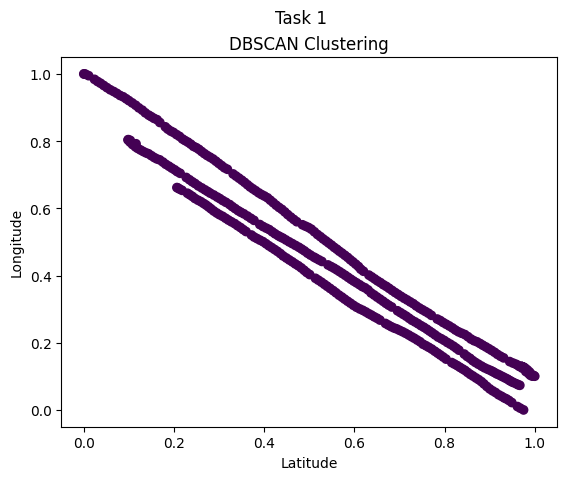

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

df = pd.read_csv("A_7_1_dbscan_data.csv")
x = df.to_numpy()

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(x)

fig, ax1 = plt.subplots()
fig.suptitle("Task 1")
ax1.scatter(x[:, 0], x[:, 1], c=dbscan.labels_)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_title('DBSCAN Clustering')
plt.show()

## KMeans Clustering

KMeans partitions data into a predefined number of clusters by minimizing intra-cluster variance. We compare predicted clusters with true labels.

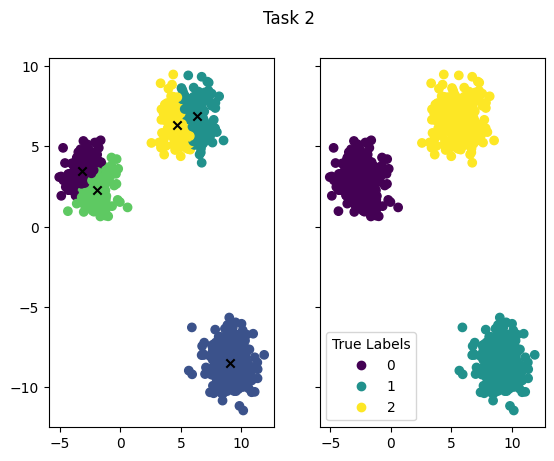

In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from sklearn.cluster import KMeans

def read_csv():
    x = []
    y = []
    with open("A_7_1_k_means_data.csv", newline="") as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            x.append([float(row[i]) for i in range(2)])
            y.append(int(row[2]))
    return np.array(x), np.array(y)

x, y = read_csv()
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(x)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.suptitle("Task 2")

ax1.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black", marker="x")

scatter = ax2.scatter(x[:, 0], x[:, 1], c=y)
handles, labels = scatter.legend_elements()
ax2.legend(handles, labels, title="True Labels")

plt.show()

## PCA Visualization

Principal Component Analysis (PCA) reduces dimensionality while preserving variance. This helps visualize high-dimensional data in 2D space.

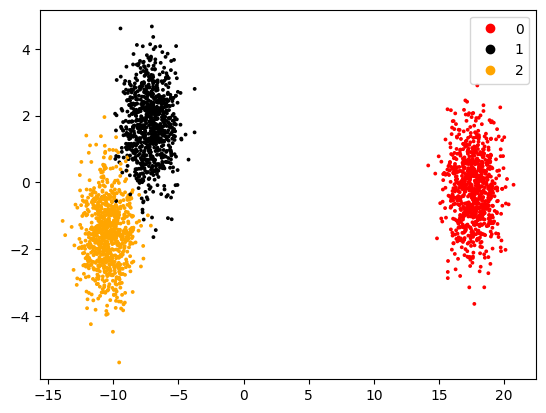

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

def visualize(x, y):
    fig, ax = plt.subplots(1, 1)
    colours = ListedColormap(["red", "blue", "green", "black", "teal", "orange"])
    scatter = ax.scatter(x[:, 0], x[:, 1], s=3, c=y, cmap=colours)
    ax.legend(scatter.legend_elements()[0], ["0", "1", "2", "3", "4", "5"])
    plt.show()

def read_csv():
    x = []
    y = []
    with open("A_7_1_pca_data.csv", newline="") as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            x.append([float(row[i]) for i in range(4)])
            y.append(int(row[4]))
    return np.array(x), np.array(y)

x, y = read_csv()
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
visualize(x_pca, y)